To open notebook in Colab please click below:

<a href="https://colab.research.google.com/github/bwolfson2/foster_in_dev/blob/master/Homeworks/Homework%203.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" /> </a>

Then save the notebook to your personal Google Drive, and run the following cell.

# Predicting Churn

After discussing the churn problem at TelCo with Henrietta for a while (remember, from your pre-class assignment?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. 

You've been authorized to give the retention offer to up to 25% of the customers whose contract is expiring. It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. The historical data includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

In [3]:
!git clone https://github.com/powenfang/Data-Science-for-Business-2021Fall-Elkan
%cd Data-Science-for-Business-2021Fall-Elkan/Homeworks/

Cloning into 'Data-Science-for-Business-2021Fall-Elkan'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 57 (delta 13), reused 37 (delta 4), pack-reused 0
Unpacking objects: 100% (57/57), done.
/content/Data-Science-for-Business-2021Fall-Elkan/Homeworks/Data-Science-for-Business-2021Fall-Elkan/Homeworks


Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.

In [4]:
import numpy as np
import pandas as pd

# Just change the path below so that it points to your file.
data_path = "./data/data-hw3.csv" 

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)

__1. Split the data into 80% training data and 20% test data.__

In [ ]:
from sklearn.model_selection import train_test_split
# Your code goes here


__2. Build the best model you can for each of the following three model types:__
- __A decision tree classifier. Try different values for the parameter min_samples_leaf.__
- __A logistic regression. Try different values for the parameter C.__
- __A third model of your choice. Some suggestions: KNN, SVM, etc. Try different paramater values for this one too.__

__Optimize in terms of their generalization performance using ROC Area and cross-validation with 10 folds. Remember to use only the training data (do not use the test data at all for this example). For each of these model types, you should report the best parameter value you found and the corresponding ROC Area in the cross-validation. Your code should also show the process you went through to try different complexity parameter(s) for each model type. \\
Pick one model to move forward with. Why did you select this one?__

__HINT: There is an example below of the ROC Area for a DecisionTreeClassifier using cross validation.__  

In [6]:
# The code below is just meant as an example for you to compute the ROC Area using cross validation.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

target = "Churn_Yes"
predictors = df.columns[df.columns != target]
example_model = DecisionTreeClassifier()
# Remember to only use the training data here!!
avg_auc = cross_val_score(example_model, df[predictors], df[target], cv = 10, scoring = "roc_auc")
print(avg_auc.mean())

0.6623421269730076


In [ ]:
# Your code goes here

__3. Use your test data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together). Would you consider changing the selected model after looking at the curves? If yes, explain why. If not, explain what would the curves need to look like for you to consider changing the selected model.__

__HINT: There is an example below of the ROC curve for the DecisionTreeClassifier that was used earlier__

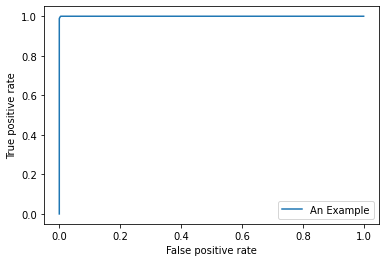

In [7]:
# The code below is just meant as an example for you to plot the ROC curve.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Remember to use the TRAINING data here!! 
example_model.fit(df[predictors], df[target])
# And to use the TEST data here!!
probs = example_model.predict_proba(df[predictors])[:, 1]
fpr, tpr, thresholds = roc_curve(df[target], probs)
plt.plot(fpr, tpr, label="An Example")
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()

In [ ]:
# Your code goes here 

__4. What would be the potential benefit of stopping someone from leaving? Round the unit cost * unit revenue to integer and print the cost matrix. HINT: Take a look at the description of the data and the retention offer.__

In [ ]:
# Your code goes here
# find the unit_cost & unit_revenue and fillin the following code block

In [ ]:
unit_cost = ???
unit_revenue = ???

cost_matrix = pd.DataFrame([[unit_revenue - unit_cost, - unit_cost], [0, 0]], columns=['p', 'n'], index=['Y', 'N'])
print("Cost matrix")
print(cost_matrix)

__5. Split your training data into two sets, one with 90% of the data (the "sub-training" set) and another with 10% of the data (the validation set). Train the model you selected with the "sub-training" set, apply it to the validation set, and plot a profit curve by ranking customers according to their probability of churning. Make a recommendation of what people to target with the retention incentive according to this profit curve.  
HINT: utilize the following functions__

In [11]:
def build_cumulative_curve(model, X_validation, y_validation, scale=100):
    # Get the probability of Y_test records being = 1
    Y_test_probability_1 = model.predict_proba(X_validation)[:, 1]

    # Sort these probabilities and the true value in descending order of probability
    order = np.argsort(Y_test_probability_1)[::-1]    
    
    Y_test_probability_1_sorted = Y_test_probability_1[order]
    Y_test_sorted = np.array(y_validation)[order]

    # Build the cumulative response curve
    x_cumulative = np.arange(len(Y_test_probability_1_sorted)) + 1
    y_cumulative = np.cumsum(Y_test_sorted)

    # Rescale
    x_cumulative = np.array(x_cumulative)/float(x_cumulative.max()) * scale
    y_cumulative = np.array(y_cumulative)/float(y_cumulative.max()) * scale
    
    return x_cumulative, y_cumulative

def plot_profit_curve(model, model_name, sub_X_train, sub_y_train, X_validation, y_validation):
    ##############################
    # input
    #   model: a sklearn model object like DecisionTreeClassifier, LogisticRegression, etc.
    #   model_name: string, the name of the model to serve as the label in the plot. e.g. "Logistic Regression"
    #   sub_X_train: a dataframe, the training set with features only
    #   sub_y_train: a dataframe, the training set with target variable only
    #   X_validation: a dataframe, the test set with features only
    #   y_validation: a dataframe, the test set with target variable only
    #
    # output
    #   Profit curve: a matplot.lib plot
    ##############################

    total_obs = len(sub_y_test)
    total_pos = sub_y_test.sum()

    model.fit(sub_X_train, sub_y_train)

    x_cumulative, y_cumulative = build_cumulative_curve(model, X_validation, y_validation, scale=1)
    profits = unit_revenue * y_cumulative * total_pos - unit_cost * x_cumulative * total_obs
    plt.plot(x_cumulative*100, profits, label = model_name)
    # Plot other details
    plt.xlabel("Percentage of users targeted")
    plt.ylabel("Profit")
    plt.title("Profit curve")
    plt.legend()

In [ ]:
# Your code goes here

__6. Can you think of something better than ranking according to the probability of churning? If so, tell us what it is and plot a profit curve according to this new ranking. Compare the results of the new ranking with the results you got in the previous question. Are the results any better? Would your recommendation change?__

In [ ]:
# Your code goes here

__7. Now the you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution. Use the entire training data to train the model you selected, and then use the model on the test data to decide which customers to target with a retention offer. How much money do you estimate that your recommendation would have saved if we had given the retention offer to the customers in the test data?  HINT: read the case description at the beginning carefully__

In [ ]:
# Your code goes here